In [48]:
#Illustration of K-means by example
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
%matplotlib inline

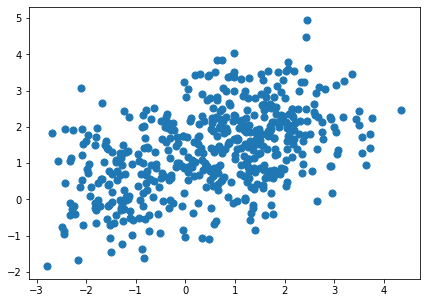

In [51]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=3,
                       cluster_std=0.9)
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], s=50);

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=10000)
kmeans.fit(X)
labels = kmeans.predict(X)
print(labels)

[1 1 1 0 1 1 1 1 2 0 0 2 1 2 2 0 2 0 1 1 1 0 2 2 1 2 0 0 2 2 0 1 0 2 2 1 1
 1 0 0 1 2 2 0 0 1 2 1 0 2 0 0 0 1 0 1 0 2 2 0 2 1 1 1 2 0 2 1 1 1 0 1 1 0
 1 1 0 0 2 0 2 1 0 2 1 2 2 1 0 2 0 0 2 2 2 2 1 0 2 0 1 1 0 2 0 1 1 2 1 2 1
 1 2 0 0 0 2 0 0 1 2 2 2 0 0 2 2 2 1 2 2 1 1 0 0 1 1 2 0 2 0 1 0 2 0 0 1 2
 2 0 0 1 2 0 0 0 2 1 2 2 1 1 1 0 1 1 2 0 2 0 0 1 2 2 0 2 2 2 1 2 1 1 0 1 0
 0 2 0 1 2 0 2 0 0 0 1 1 1 1 0 1 2 2 2 1 1 1 2 1 1 2 2 0 2 1 2 0 2 1 2 0 2
 2 2 2 0 0 0 1 1 2 0 0 2 2 0 2 1 2 1 1 1 0 0 2 1 0 2 2 1 1 0 2 2 2 0 1 2 1
 0 1 2 0 0 2 0 1 1 1 2 2 2 1 0 0 2 1 2 1 0 1 2 0 1 2 1 1 1 1 0 1 0 0 2 1 0
 1 0 0 1 1 0 2 0 2 2 0 2 0 2 1 2 1 2 2 0 0 0 1 1 0 1 0 1 0 0 0 0 0 2 0 1 2
 2 0 0 0 1 1 1 0 0 2 0 0 0 2 2 2 2 1 0 0 1 1 2 0 1 1 2 2 1 1 0 1 1 2 1 2 2
 0 1 0 1 0 2 1 0 2 1 1 0 2 0 1 2 0 1 0 0 0 2 2 1 2 0 1 0 1 1 0 1 0 1 2 0 0
 1 1 1 0 2 1 1 0 1 2 0 2 1 2 2 2 1 0 2 2 0 0 1 0 2 0 1 2 0 1 0 2 2 0 1 0 2
 2 1 0 1 1 1 1 2 0 0 1 2 1 2 0 0 1 2 2 2 1 0 0 2 0 1 1 2 1 0 2 2 2 0 2 1 1
 2 1 2 0 2 1 0 1 0 0 2 1 

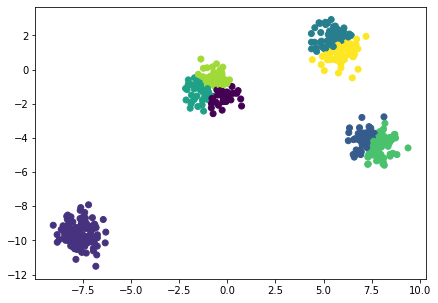

In [38]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

In [39]:
#Deciding Optimal Number of CLusters:
from sklearn.metrics import davies_bouldin_score
sse,db = {}, {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X)
    labels=kmeans.predict(X)
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of squared distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,labels)

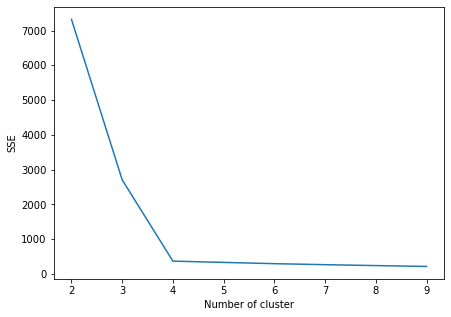

In [40]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

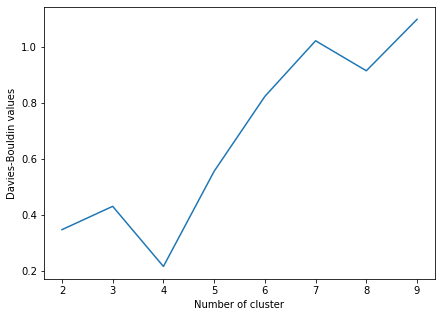

In [41]:
#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

In [42]:
#Accuracy metrics:
# Calculate Silhoutte Score
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.330


In [ ]:
#Accuracy metrics:
# Calculate Homogeneity score:
from sklearn.metrics import homogeneity_score
A=homogeneity_score(y_true, labels)
print(A)